In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import gamma

In [3]:
path = '/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'

with open(path + 'community_area_income_range_TIF_2018.pickle', 'rb') as file:
    data = pickle.load(file)

# First, check how the income distribution will look like

In [4]:
data.head(3)

comm_income = data[data['Community'] == 'DOUGLAS']

In [5]:
comm_income

,Community,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,DOUGLAS,"[57.40762451509675, 713.9492848073397, 15.2827...","[21.994821804552224, 344.3948783534142, 6.1836...","[21.20884558653767, 260.9847233860535, 5.67753...","[12.67804685165525, 173.07105729535277, 3.8282...","[10.601890832255776, 186.0949672337926, 3.2029...","[22.27576018598534, 202.61396595292337, 5.9111...","[6.135737068749961, 80.9013339043529, 2.196361...","[9.357099968341611, 135.6478441004492, 3.38378...","[11.52128493593525, 135.29082706287335, 3.7358...","[15.985779827622741, 177.40539748771045, 4.221...","[24.301013111731134, 225.22877996566703, 6.598...","[22.428833875895542, 228.9486261287551, 6.2915...","[20.885460459098002, 179.67004926449607, 5.197...","[8.829626575174162, 94.1448950959203, 2.586054...","[9.739398566605601, 81.74179114754355, 2.86381...","[12.487788819861139, 78.76708851312921, 2.4723..."


In [6]:
col_names = list(data.columns)
col_names.pop(0)

'Community'

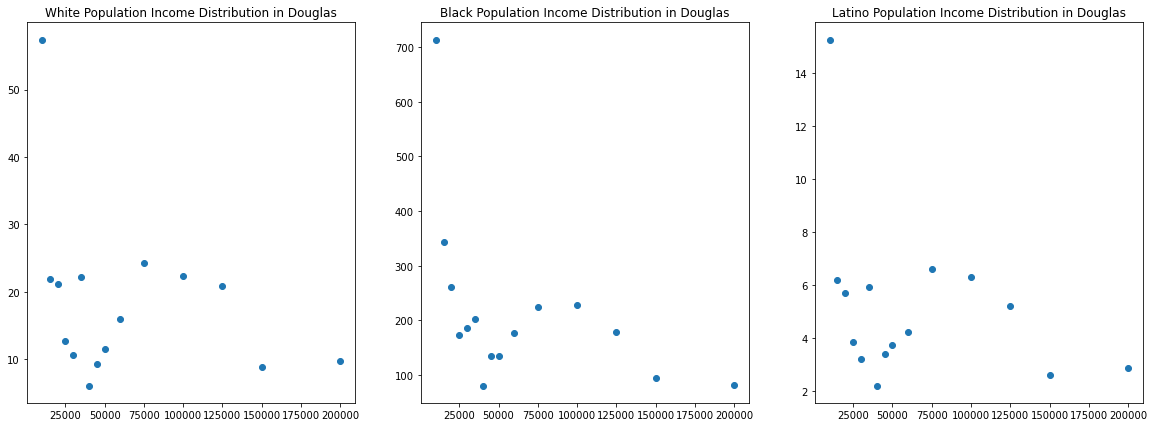

In [9]:
ranges = [10000, 14999, 19999, 24999, 29999, 34999, 39999, 44999, 49999, 59999, 74999, 99999, 124999, 149999, 199999, np.inf]

# obtain percentage of population under the income in list 'ranges'

W_list = []; B_list = []; L_list = []

for col in col_names:
    W_list.append(comm_income[col][0][0])
    B_list.append(comm_income[col][0][1])
    L_list.append(comm_income[col][0][2])

W_list = np.array(W_list); B_list = np.array(B_list); L_list = np.array(L_list)

fig, ax = plt.subplots(1, 3, figsize = (20,7))

ax[0].scatter(ranges, W_list)
ax[0].set_title("White Population Income Distribution in Douglas")
ax[1].scatter(ranges, B_list)
ax[1].set_title("Black Population Income Distribution in Douglas")
ax[2].scatter(ranges, L_list)
ax[2].set_title("Latino Population Income Distribution in Douglas")
plt.savefig("Median Income Scatter.png")
# Let's go with the exponential distribution

# Gamma distribution seems to fit well. Perform curvefitting using cumulative gamma distribution

In [31]:
W_percentage = W_list/np.sum(W_list); B_percentage = B_list/np.sum(B_list); L_percentage = L_list/np.sum(L_list)

W_cumulative_percentage = np.array([np.sum(W_percentage[:i+1]) for i in range(len(W_percentage))])
B_cumulative_percentage = np.array([np.sum(B_percentage[:i+1]) for i in range(len(B_percentage))])
L_cumulative_percentage = np.array([np.sum(L_percentage[:i+1]) for i in range(len(L_percentage))])

### test on one case

lambda = 0.5232071987623983, CoD = 0.9434521605669437
Median = $261711.50448756752


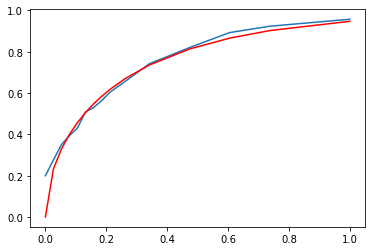

In [32]:
def cumulative_gamma_dist(x, shape, scale):
    return gamma.cdf(x, shape, scale=scale)

# define new range array to perform curve fitting. Last element is not needed. Also, scale into 0-1 value.
cf_ranges = (np.array(ranges[:-1]) - ranges[0]) / (ranges[-2] - ranges[0])

pars, cov = curve_fit(f = cumulative_gamma_dist, xdata = cf_ranges, ydata = W_cumulative_percentage[:-1], bounds = (-np.inf, np.inf))
plt.plot(cf_ranges, W_cumulative_percentage[:-1])
plt.plot(cf_ranges, cumulative_gamma_dist(cf_ranges, pars[0], pars[1]), color='red')

def Coef_of_Determination(y_data, y_pred):

    y_mean = np.mean(y_data)

    # Calculate the total sum of squares (TSS)
    TSS = np.sum((y_data - y_mean) ** 2)

    # Calculate the residual sum of squares (RSS)
    RSS = np.sum((y_data - y_pred) ** 2)

    # Calculate the coefficient of determination (R^2)
    R_squared = 1 - (RSS / TSS)

    return R_squared

print(f'pars = {pars[0], pars[1]}, CoD = {Coef_of_Determination(W_cumulative_percentage[:-1], cumulative_gamma_dist(cf_ranges, pars[0], pars[1]))}')
print('Median = ${}'.format((np.log(2)/pars[0])*(ranges[-2] - ranges[0]) + ranges[0]))


# Now, iterate for everything

In [44]:
communities = np.array(data['Community'])
col_names = list(data.columns)
col_names.pop(0)

def cumulative_gamma_dist(x, shape, scale):
    return gamma.cdf(x, shape, scale=scale)

def Coef_of_Determination(y_data, y_pred):

    y_mean = np.mean(y_data)

    # Calculate the total sum of squares (TSS)
    TSS = np.sum((y_data - y_mean) ** 2)

    # Calculate the residual sum of squares (RSS)
    RSS = np.sum((y_data - y_pred) ** 2)

    # Calculate the coefficient of determination (R^2)
    R_squared = 1 - (RSS / TSS)

    return R_squared

median_incomes_list = []
CoD_list = []

ranges = [10000, 14999, 19999, 24999, 29999, 34999, 39999, 44999, 49999, 59999, 74999, 99999, 124999, 149999, 199999, np.inf]
cf_ranges = (np.array(ranges[:-1]) - ranges[0]) / (ranges[-2] - ranges[0])


for community in communities:
    comm_income = data[data['Community'] == community]


    # obtain percentage of population under the income in list 'ranges'
    W_list = []; B_list = []; L_list = []

    for col in col_names:
        W_list.append(comm_income[col].iloc[0][0])
        B_list.append(comm_income[col].iloc[0][1])
        L_list.append(comm_income[col].iloc[0][2])

    W_list = np.array(W_list); B_list = np.array(B_list); L_list = np.array(L_list)
    
    temp_CoD_list = []
    temp_median_income_list = []


    # there are communities with certain racial population = 0
    if np.sum(W_list) != 0:
        W_percentage = W_list/np.sum(W_list)
        W_cumulative_percentage = np.array([np.sum(W_percentage[:i+1]) for i in range(len(W_percentage))])

        pars, _ = curve_fit(f = cumulative_gamma_dist, xdata = cf_ranges, ydata = W_cumulative_percentage[:-1], bounds = (-np.inf, np.inf))
        
        temp_CoD_list.append(Coef_of_Determination(W_cumulative_percentage[:-1], cumulative_gamma_dist(cf_ranges, pars[0], pars[1])))
        temp_median_income_list.append(gamma.median(pars[0], scale=pars[1])*(ranges[-2] - ranges[0]) + ranges[0])
    else:
        temp_CoD_list.append(0)
        temp_median_income_list.append(0)
        
    if np.sum(B_list) != 0:
        B_percentage = B_list/np.sum(B_list)
        B_cumulative_percentage = np.array([np.sum(B_percentage[:i+1]) for i in range(len(B_percentage))])

        pars, _ = curve_fit(f = cumulative_gamma_dist, xdata = cf_ranges, ydata = B_cumulative_percentage[:-1], bounds = (-np.inf, np.inf))
        
        temp_CoD_list.append(Coef_of_Determination(B_cumulative_percentage[:-1], cumulative_gamma_dist(cf_ranges, pars[0], pars[1])))
        temp_median_income_list.append(gamma.median(pars[0], scale=pars[1])*(ranges[-2] - ranges[0]) + ranges[0])
    else:
        temp_CoD_list.append(0)
        temp_median_income_list.append(0)

    if np.sum(L_list) != 0:
        L_percentage = L_list/np.sum(L_list)
        L_cumulative_percentage = np.array([np.sum(L_percentage[:i+1]) for i in range(len(L_percentage))])

        pars, _ = curve_fit(f = cumulative_gamma_dist, xdata = cf_ranges, ydata = L_cumulative_percentage[:-1], bounds = (-np.inf, np.inf))
        
        temp_CoD_list.append(Coef_of_Determination(L_cumulative_percentage[:-1], cumulative_gamma_dist(cf_ranges, pars[0], pars[1])))
        temp_median_income_list.append(gamma.median(pars[0], scale=pars[1])*(ranges[-2] - ranges[0]) + ranges[0])
    else:
        temp_CoD_list.append(0)
        temp_median_income_list.append(0)

    median_incomes_list.append(temp_median_income_list)
    CoD_list.append(temp_CoD_list)

# Mdeian Income Dataframe
MI_df = pd.DataFrame(columns = ['Community', 'Median Income', 'Coefficient of Determination'])

for idx, community in enumerate(communities):
    MI_df.loc[idx] = np.array([community, median_incomes_list[idx], CoD_list[idx]], dtype = object)

with open(path + 'median_income_gamma_dist.pickle', 'wb') as file:
    pickle.dump(MI_df, file)

In [45]:
MI_df

,Community,Median Income,Coefficient of Determination
0,DOUGLAS,"[34469.6939455719, 27864.888924710365, 34213.0...","[0.9434521605669437, 0.9355148844992411, 0.950..."
1,OAKLAND,"[34860.50849566266, 26937.633700037553, 29310....","[0.951313641414661, 0.9385083979704685, 0.9420..."
2,FULLER PARK,"[26903.502087768913, 22102.051008230752, 26097...","[0.9550925047643231, 0.9509172941325514, 0.969..."
3,GRAND BOULEVARD,"[36282.96125709824, 30450.841854185204, 29851....","[0.9549784632048307, 0.9587783982257574, 0.945..."
4,KENWOOD,"[43312.530341867234, 26127.75808211221, 40815....","[0.9808207148103042, 0.9487674869561132, 0.981..."
...,...,...,...
72,MOUNT GREENWOOD,"[93078.22875411273, 85833.436350363, 91928.231...","[0.9757085938582958, 0.9920691548997352, 0.970..."
73,MORGAN PARK,"[64975.431759763946, 42163.115418632864, 52236...","[0.991030405296049, 0.9798520914152271, 0.9864..."
74,OHARE,"[64975.431759763946, 42163.115418632864, 52236...","[0.991030405296049, 0.9798520914152271, 0.9864..."
75,EDGEWATER,"[53100.620721655396, 43346.94563681764, 51419....","[0.988328799421316, 0.9876388684469087, 0.9903..."
